In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
import re

import cufflinks as cf
import chart_studio.plotly as py
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


cf.set_config_file(sharing ="public", theme ="ggplot", offline = True)

## Importing

In [2]:
GSAF = r"C:\Users\lenovo\Desktop\My_first_project\My_project\input\attacks.csv"

df = pd.read_csv(GSAF, encoding = "ISO-8859-1")

## hipothesis: the great white shark is the most lethal shark and he likes to eat surfers more than to eat swimmers. I assume 
## the great white shark doesnt distinguish between australians, americans and british people. To him, they all taste the same.

In [3]:
df.dropna(axis=0, inplace= True, how='all') #i delete all rows which are only Nan

## Cleaning

In [4]:
df.drop("Unnamed: 22", inplace = True, axis=1) #deleting unnamed 22
df.drop("Unnamed: 23", inplace = True, axis=1)
df.drop("Case Number.2", inplace = True, axis=1)# deleting case number 2, duplicated
df.drop("href formula", inplace = True, axis=1) #deleting href formula, duplicated

## "Year" variable

In [5]:
df.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,Case Number.1,original order
5585,1898.10.28,28-Oct-1898,1898.0,Unprovoked,USA,Hawaii,Off Kohala,Jumped overboard,Ah Hoi,M,NaN,FATAL,Y,NaN,NaN,"Hawaiian Gazette, 11/1/1898",1898.10.28-AhHol.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1898.10.28,718.0
2609,1991.01.09,09-Jan-1991,1991.0,Unprovoked,AUSTRALIA,Western Australia,Scarborough,Surf-skiing,Grant Kenny,M,NaN,"No injury, shark brushed ski",N,NaN,4 m shark,"Courier-Mail, 1/10/1991, p.5",1991.01.09-Kenny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.01.09,3694.0
2802,1986.11.04,04-Nov-1986,1986.0,Unprovoked,USA,Florida,"Tiger Shores Beach, Martin County",Surfing,Daniel Lund,M,23,Ankle bitten,N,NaN,NaN,"Miami Herald, 11/5/1986",1986.11.04-Lund.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1986.11.04,3501.0
8651,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8011,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7973,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8292,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,2002.05.31.a,31-May-2002,2002.0,Unprovoked,USA,Florida,"St. George Island (near Apachicola), Franklin ...",Floating on a raft,Matt Tichenor,M,16,Lacerated foot,N,16h15,1 m shark,"South Florida Sun-Sentinel; Orlando Sentinel, ...",2002.05.31.a-Tichenor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.05.31.a,4446.0
5297,1916.11.10,10-Nov-1916,1916.0,Unprovoked,AUSTRALIA,Queensland,Townsville,Swimming,Walter Gregson,M,NaN,FATAL,Y,06h00,NaN,"Cairns Post, 11/11/1916",1916.11.10-Gregson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.11.10,1006.0
5821,1880.05.02.b,02-May-1880,1880.0,Unprovoked,INDIA,West Bengal,(Calcutta?),Bathing in river,Sasti,M,NaN,"FATAL, left forearm & hand bitten, brachial ar...",Y,12h00,NaN,"V.M. Coppleson (1958), p.260, G.A. Llano, pp. ...",1880.05.02.b-Sasti.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1880.05.02.b,482.0


In [6]:
new_Date = df["Year"].astype(str)

new_Date = new_Date.str.replace("-", "/")
new_Date = new_Date.str.replace(" ", "/")
new_Date = new_Date.str.replace("Jan", "01")
new_Date = new_Date.str.replace("Feb", "02")
new_Date = new_Date.str.replace("Mar", "03")
new_Date = new_Date.str.replace("Apr", "04")
new_Date = new_Date.str.replace("May", "05")
new_Date = new_Date.str.replace("Jun", "06")
new_Date = new_Date.str.replace("Jul", "07")
new_Date = new_Date.str.replace("Aug", "08")
new_Date = new_Date.str.replace("Sep", "09")
new_Date = new_Date.str.replace("Oct", "10")
new_Date = new_Date.str.replace("Nov", "11")
new_Date = new_Date.str.replace("Dec", "12")
df["Date"] = new_Date
df["Date"]


0        2018.0
1        2018.0
2        2018.0
3        2018.0
4        2018.0
          ...  
8698        nan
8699        nan
8700        nan
8701        nan
25722       nan
Name: Date, Length: 8703, dtype: object

<bound method Axes.scatter of <AxesSubplot:>>

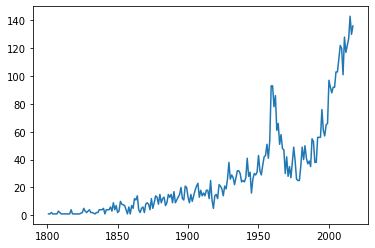

In [7]:
df["Year_1900"] = df[df['Year']>1800]['Year']  ## i only want dates after 1900 becouse the otheres i dont find it relevant
df["Year_1900"] = df[df["Year_1900"]<2018]["Year_1900"]
 
df["Year_1900"].value_counts().sort_index().plot().scatter

### Gender variable

In [8]:
df["Sex "].sample(10)

def gender_cleaning(string):
    string = str(string).lower().strip()
    if "m" in string:
        return "Man"
    elif "f" in string:
        return "Woman"
    else:
        return np.nan
    
df["Sex "]= df["Sex "].apply(gender_cleaning)
df["Sex "].value_counts()
    

Man      5096
Woman     637
Name: Sex , dtype: int64

## Age variable

In [9]:
df["Age"].sample(10)

3171    NaN
2626     22
4932    NaN
2623     49
3588    NaN
2770     40
6710    NaN
8078    NaN
4933    NaN
6967    NaN
Name: Age, dtype: object

In [10]:
def age_cleaning(string):  ## function to clean the Age variable and get rid of values which cant be int.
    try:
        string = int(string)
    except:
        return np.nan
    return int(string)

df["Age"] = df["Age"].apply(age_cleaning)

## "Date" variable

In [11]:
get_date = "\d{4}\.\d{2}\.\d{2}" #here i get the dates of href, whcih are at the end and its more clean data

df["New_dates"] = df["href"].apply(lambda x: re.findall(get_date, str(x))).explode()

In [12]:
def autoconvert_format(value):  # here i convert DataFrame column type from string to datetime with a exception of format
    try:
        value = pd.to_datetime(value)
        return value
    except:
        pass
    return value

df["New_dates"] = df["New_dates"].apply(autoconvert_format)

In [13]:
df["Final_dates"] = pd.to_datetime(df["New_dates"], errors="coerce") #with the coerce option, the values who doesnt stick 
                                                                        #they go nan.

In [14]:
df["Day_of_week"] = df["Final_dates"].dt.day_name() #i create column for the day and the month the attack happened
df["Month"] = df["Final_dates"].dt.month_name()

In [15]:
date_filter = (df["Final_dates"] <= "2020") & (df["Final_dates"] > "1900")
df = df.loc[date_filter]

<AxesSubplot:title={'center':'Day of the attack.'}>

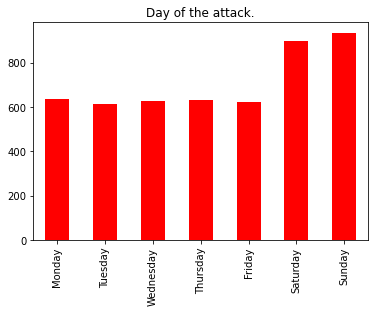

In [16]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


df["Day_of_week"].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='red', title= "Day of the attack.", sort_columns=True)

## i order by days


<AxesSubplot:title={'center':'Month of the attack.'}>

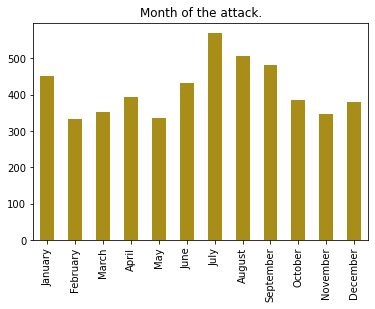

In [17]:
df["Month"].value_counts()[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]].plot(kind='bar', color ="#a98d19", title= "Month of the attack.", sort_columns=True)

## data in January is not real i assume i get some 01/01/1900 when they dont know when it happened. 

## Activities variable

In [18]:
def activites_cleaning(string): ## function to apply to clean the activity base, if i return nan i can get 8 major values
    string = str(string).lower().strip()
    if string != string:
        return np.nan
    elif "swimming" in string or "bathing" in string or "floating" in string or "splashing" in string or "jumped into the water" in string or "playing" in string:
        return "Swimming"
    elif "diving" in string or "snorkel" in string:
        return "Diving"
    elif "fishing" in string:
        return "Fishing"
    elif "surf" in string or "body boarding" in string or "body-boarding" in string or "boogie boarding" in string or "paddleskiing" in string:
        return "Surf"
    elif "standing" in string:
        return "Standing"
    elif "kayaking" in string or "ship" in string or "sail" in string or "boat" in string or "canoeing" in string or "board" in string or "rowing" in string or "fell into the water" in string:
        return "Boating"
    elif "disaster" in string:
        return "Sea catastrophe"
    elif "wading" in string or "walking" in string or "treading water" in string:
        return "Walking near the water"
    elif "Flying" in string or "sky" in string or "fly" in string:
        return "SHARKNADO??"
    else:
        return np.nan

df["Activity"] = df["Activity"].apply(activites_cleaning)

In [19]:
df["Activity"].value_counts().head(10)

Surf                      1256
Swimming                  1047
Fishing                    876
Diving                     532
Boating                    238
Walking near the water     194
Standing                   106
Sea catastrophe             22
SHARKNADO??                  1
Name: Activity, dtype: int64

In [20]:
df["Activity"].value_counts().iplot(kind="bar", color="blue", title="Main activity during the attack")

In [21]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'Case Number.1',
       'original order', 'Year_1900', 'New_dates', 'Final_dates',
       'Day_of_week', 'Month'],
      dtype='object')

## Type variable

In [22]:
df["Type"].value_counts()

Unprovoked      3633
Provoked         479
Invalid          425
Sea Disaster     159
Boating          158
Boat             105
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [23]:
def type_cleaning(string): ## i do the same with the type of attack column
    string = str(string).lower().strip()
    if "unprovoked" in string:
        return "Probably no"
    elif "provoked" in string:
        return "They had it coming"
    else:
        return np.nan
    
df["Type"] = df["Type"].apply(type_cleaning)

In [24]:
df["Type"].value_counts().iplot(kind="bar", title="The human deserved to die?")

## FATALITY RATE

In [25]:
df["Fatal (Y/N)"].sample(10)

1632          N
2894          N
3499          N
2356          N
1676          N
3139          N
624     UNKNOWN
4969          N
4200          Y
2096          N
Name: Fatal (Y/N), dtype: object

In [26]:
def fatality_clean(string):
    string = str(string).lower().strip()
    if "yes" in string or "y" in string or "s" in string:
        return "Fatal attack"
    elif "no" in string or "Neg" in string or "n" in string:
        return "Barely alive"
    else:
        return np.nan

df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(fatality_clean)

In [27]:
df["Fatal (Y/N)"].value_counts().iplot(kind="bar", title= "Shark efficiency")

### Species variable

In [28]:
df["Species "].value_counts().head(20)

White shark                                           141
Shark involvement prior to death was not confirmed     99
Shark involvement not confirmed                        79
Invalid                                                76
Tiger shark                                            56
4' shark                                               40
Bull shark                                             40
6' shark                                               37
1.8 m [6'] shark                                       32
Shark involvement prior to death unconfirmed           27
3' shark                                               25
5' shark                                               25
1.5 m [5'] shark                                       25
4' to 5' shark                                         23
1.2 m [4'] shark                                       23
Questionable                                           23
2 m shark                                              22
No shark invol

In [29]:
def shark_species(string):
    string = str(string).lower().strip()
    if "white" in string or "blanco" in string or "great" in string:
        return "Great white shark"
    elif "invalid" in string or "not confirmed" in string or "questionable" in string or "unconfirmed" in string or "unidentified" in string:
        return np.nan
    elif "tiger" in string:
        return "Tiger shark"
    elif "bronze" in string:
        return "Bronze whaler shark"
    elif "bull" in string:
        return "Bull shark"
    elif "wobbegong" in string:
        return "Wobbegong shark"
    elif "blacktip" in string:
        return "Blacktip shark"
    elif "raggedtooth" in string:
        return "Raggedtooth shark"
    elif "blue" in string:
        return "Blue shark"
    elif "mako" in string:
        return "Mako shark"
    elif "grey" in string:
        return "Grey shark"
    elif "zambesi" in string:
        return "Zambesi shark"
    
    else:
        return np.nan
    

In [30]:
df["Species "] = df["Species "].apply(shark_species)


In [31]:
df["Species "].value_counts().head(20)

Great white shark      610
Tiger shark            248
Bull shark             157
Blacktip shark          96
Bronze whaler shark     64
Grey shark              54
Mako shark              47
Blue shark              46
Wobbegong shark         43
Raggedtooth shark       41
Zambesi shark           23
Name: Species , dtype: int64

In [32]:
df["Species "].value_counts().iplot(kind="bar", title= "Most agressive shark species")

### Country variable 

In [33]:
df["Country"].value_counts().head(40)

USA                     1964
AUSTRALIA               1125
SOUTH AFRICA             505
BRAZIL                   104
BAHAMAS                   88
NEW ZEALAND               86
PAPUA NEW GUINEA          77
MEXICO                    62
REUNION                   52
PHILIPPINES               48
ITALY                     46
FIJI                      36
MOZAMBIQUE                35
NEW CALEDONIA             31
JAPAN                     29
SPAIN                     28
EGYPT                     27
CROATIA                   25
CUBA                      23
SOLOMON ISLANDS           22
HONG KONG                 21
FRENCH POLYNESIA          19
INDONESIA                 16
JAMAICA                   16
PANAMA                    14
BERMUDA                   13
COSTA RICA                13
TURKEY                    12
ENGLAND                   12
VIETNAM                   11
PACIFIC OCEAN             10
IRAN                      10
GREECE                    10
ATLANTIC OCEAN            10
TAIWAN        

In [34]:
def country_cleaning(string):
    string = str(string).lower().strip()
    if "usa" in string or "united states" in string or "the states" in string or "u.s.a" in string or "u.s" in string:
        return "United States of America"
    elif "australia" in string or "aus" in string:
        return "Australia"
    elif "south africa" in string:
        return "South Africa"
    elif "brazil" in string or "brasil" in string:
        return "Brazil"
    elif "zealand" in string:
        return "New Zealand"
    elif "papua new guinea" in string or "papua" in string or "guinea" in string:
        return "Papua New Guinea"
    elif "mexico" in string:
        return "Mexico"
    elif "reunion" in string:
        return "Reunion (France)"
    elif "philippines" in string or "filipin" in string:
        return "Philippines"
    elif "italy" in string or "italia" in string:
        return "Italy"
    elif "mozambique" in string:
        return "Mozambique"
    elif "caledonia" in string:
        return "New Caledonia"
    elif "japan" in string or "nihon" in string:
        return "Japan"
    elif "spain" in string:
        return "Spain"
    else:
        return np.nan
    

In [35]:
df["Country"] = df["Country"].apply(country_cleaning)

In [36]:
df["Country"].value_counts().iplot(kind="bar",color = "pink", title= "Country")

# We plotting

## FIRST: ATTACK BOXPLOT --> MOST DANGEROUS PLACE

In [37]:
df["Fatal (Y/N)"].value_counts()

Barely alive    4095
Fatal attack     868
Name: Fatal (Y/N), dtype: int64

In [38]:
df["Fatal (Y/N)"].value_counts().iplot(kind="bar", title= "Shark efficiency")

In [39]:
alive = df[df["Fatal (Y/N)"] == "Barely alive"] ## create only survivers subsetb

In [40]:
alive_bycountry = alive["Country"].value_counts() ##create country and alive subset

In [41]:
dead = df[df["Fatal (Y/N)"] == "Fatal attack"] ## create only dead people subset

In [42]:
dead_bycountry = dead["Country"].value_counts() ## create country and dead

In [43]:
df_concat = pd.concat([alive_bycountry, dead_bycountry], axis=1, names = ["Barely Alive", "Fatal Attack"])
## concat 3 variables in 1 dataframe
df_concat

,Country,Country
United States of America,1844,120
Australia,911,214
South Africa,421,84
New Zealand,76,10
Brazil,70,34
Papua New Guinea,42,37
Italy,38,8
Mexico,34,29
Reunion (France),28,24
Spain,26,2


In [44]:
df_concat.rename(columns = {'Country':'Barely Alive', 'Country':'Fatal Attack'}, inplace = True)
df_concat.rename(columns = {'Fatal Attack':'Barely Alive'}, inplace = True)
df_concat.columns = ['Barely Alive', 'Fatal Attack']

In [45]:
df_concat.reset_index(inplace=True)

In [46]:
df_concat = df_concat.rename(columns = {'index':'Country'}) ## rename country column
df_concat

,Country,Barely Alive,Fatal Attack
0,United States of America,1844,120
1,Australia,911,214
2,South Africa,421,84
3,New Zealand,76,10
4,Brazil,70,34
5,Papua New Guinea,42,37
6,Italy,38,8
7,Mexico,34,29
8,Reunion (France),28,24
9,Spain,26,2


In [47]:
figure_attack = px.histogram(df_concat, x="Country", y=["Barely Alive","Fatal Attack"], title="Did the human survive?",barmode="group", text_auto=True)
figure_attack.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

## MOST LETHAL SHARK

The sample i am using is not representative of the population because i have information only in 40% of the total data of the column species, the rest is lacking. Eitherway, we can conclude that the white shark is the most dangerous one.

In [48]:
df["Species "].value_counts().head(20)

Great white shark      610
Tiger shark            248
Bull shark             157
Blacktip shark          96
Bronze whaler shark     64
Grey shark              54
Mako shark              47
Blue shark              46
Wobbegong shark         43
Raggedtooth shark       41
Zambesi shark           23
Name: Species , dtype: int64

In [49]:
df["Species "].value_counts().iplot(kind="bar", title= "Most agressive shark species")

In [50]:
alive = df[df["Fatal (Y/N)"] == "Barely alive"] ## create only survivers subsetb
dead = df[df["Fatal (Y/N)"] == "Fatal attack"] ## create only dead people subset

alive_byspecies = alive["Species "].value_counts()
dead_byspecies = dead["Species "].value_counts()


In [51]:
df_lethality = pd.concat([alive_byspecies, dead_byspecies], axis=1)
df_lethality.reset_index(inplace=True)
df_concat = df_concat.rename(columns = {'index':'Country'})
df_lethality.columns = ["Species ",'Barely Alive', 'Fatal Attack']
df_lethality

,Species,Barely Alive,Fatal Attack
0,Great white shark,469,141.0
1,Tiger shark,190,58.0
2,Bull shark,128,29.0
3,Blacktip shark,96,NaN
4,Bronze whaler shark,60,4.0
5,Grey shark,53,NaN
6,Mako shark,45,2.0
7,Wobbegong shark,43,NaN
8,Raggedtooth shark,41,NaN
9,Blue shark,37,8.0


In [52]:
fig_lethality = px.histogram(df_lethality, x="Species ", y=["Barely Alive","Fatal Attack"], title="Shark efficiency", barmode="group", text_auto=True)
fig_lethality.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig_lethality.add_annotation(x = 0, y = 510, text="White shark = 30% efficiency :)", showarrow=False) ## i add text hehe
fig_lethality.add_annotation(x = 2, y = 250, text="Tiger shark = 30% efficiency", showarrow=False) ## i add more text but now its less fun.

## ITS A TIE!!! :(
In case of a tie, the shark with more kills wins. In this case, the great white shark is the savagest killer in the seas.

### SECOND: WHO WOULD WIN? WHITE SHARK OR AVERAGE USA JOE

In [53]:
## for the sake of having a bigger database, i assume the great white shark 
## doesnt distinguish between australians, americans and british people. To him, they all taste the same.

## 

In [54]:
df_usa = df[(df["Country"] == "United States of America") | (df["Country"] == "Australia") | (df["Country"] == "New Zealand")]
df_usa.sample(3)
df_only_usa = df[(df["Country"] == "United States of America")]
##  ## database only usa, australia and newzealand.

In [55]:
df_usa = df_usa[df_usa["Species "] == "Great white shark"]  ###only usa, only white sharks

In [56]:
sns.set(rc={"figure.figsize": (10.,5.)})

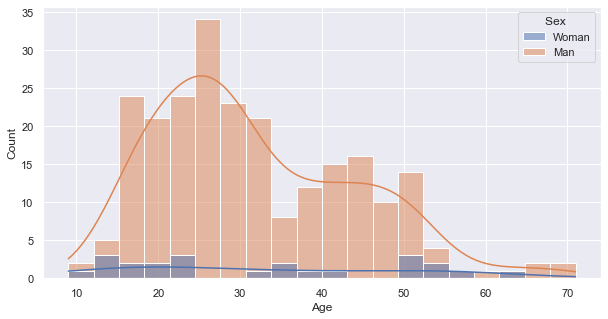

In [57]:
sns.histplot(data=df_usa, x="Age", hue="Sex ", bins=20, kde=True); ## sex and age of the victim during attack in usa+aus+nz

<AxesSubplot:xlabel='Age', ylabel='Count'>

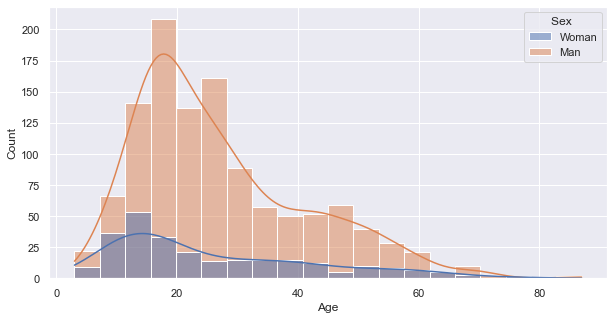

In [58]:
sns.histplot(data=df_only_usa, x="Age", hue="Sex ", bins=20, kde=True) ## sex and age of the victim during attack ONLY USA

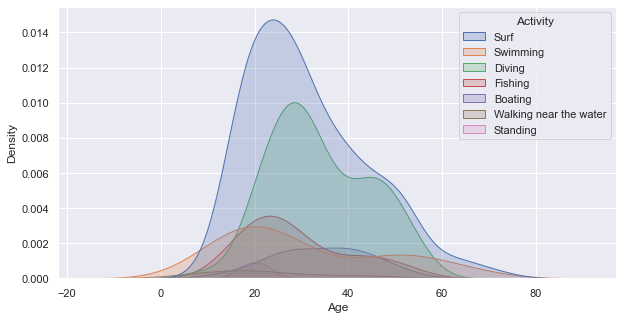

In [59]:
sns.kdeplot(data=df_usa, x="Age", hue="Activity", fill=True); ### activities and age done during attack in usa+aus+nz

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



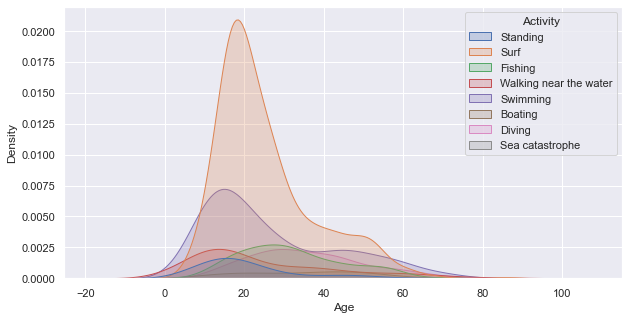

In [60]:
sns.kdeplot(data=df_only_usa, x="Age", hue="Activity", fill=True); ### activities and age done during attack ONLY USA

In [61]:
## usa people like to surf a lot. also, most of attacks objectives in usa are surfers. but swimmers are a number we should look
## into. we have to compare both values.

In [62]:
df_usa = df_usa[df_usa["Species "] == "Great white shark"]  ### first, i want to get data only of my fav shark.

In [63]:
swimmers = df_usa[df["Activity"] == "Swimming"]
surfers = df_usa[df["Activity"] == "Surf"]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10996\724944243.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10996\724944243.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [64]:
swimmers_deadoralive = swimmers["Fatal (Y/N)"].value_counts()
surfers_deadoralive = surfers["Fatal (Y/N)"].value_counts()

In [65]:
df_snack = pd.concat([swimmers_deadoralive, surfers_deadoralive], axis=1)
df_snack.reset_index(inplace=True)

df_snack.columns = ["Is the human alive?",'Swimmer', 'Surfer']
df_snack

,Is the human alive?,Swimmer,Surfer
0,Fatal attack,23,16
1,Barely alive,12,121


In [66]:
fig_snack = px.histogram(df_snack, x= "Is the human alive?", y= ["Swimmer","Surfer"] , title="Favorite snack", barmode="group", text_auto=True)
fig_snack.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
